<a href="https://colab.research.google.com/github/DavidSenseman/STA1403/blob/master/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **STA1403: "Biostats"**

### **Assignment 7: Analysis of Variance (ANOVA)**

#### In this assignment you will learn about:

1. Introduction
2. Assumptions of ANOVA
3. Data used in this Example
4. ANOVA Example
5. Calculating model effect size
6. Checking the ANOVA assumptions
7. ANOVA post-hoc testing




### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# You must run this cell second
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


## Introduction to ANOVA (One-Way)

The analysis of variance (ANOVA) can be thought of as an extension to the _t_ -test. The independent _t_ -test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 2+ groups. 

ANOVA is an **_omnibus test_**, meaning it tests the data as a whole. Another way to say that is this, ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell one where the difference is if the there is one. To find out where the difference is between the groups, one has to conduct _post-hoc_ tests. This is also covered in this assignment.

Although it can be thought of as an extension of the _t_ -test, in terms of when to use it, mathematically speaking, it’s more of a regression model and is considered a generalized linear model (GLM). The general regression equation is as follow:

$$ \text{outcome}_i = \text{model}_l + \text{error}_i $$

Replacing the general regression equation with fake groups to show context would make the equation look like this:

$$ \text{outcome}_i = \beta_0 + \beta_1 \text{Group}_1 + \beta_2 \text{Group}_2 + \text{error}_i $$


Where:

* $\beta_0$ is the model’s intercept (a.k.a. the constant term),
* $\beta_1$ is the the coefficient 
* $\text{Group}_1$ is the respective group value (Group1), and
* $\text{error}_i$ is the error present in the model

That’s enough of a primer for now, the model will be updated as when we actually get some data to work with. The testing hypothesis of an ANOVA is as follows:

* $H_0$: No difference between means, i.e. $\mu_1$ = $\mu_2$ = $\mu_3$ = $\mu_4$ = $\mu$
* $H_A$: Difference between means must exist somewhere. 

## ANOVA Assumptions
There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

1. **Normality**
    + Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality
2. **Homogeneity of variance**
    + Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation
3. **Independent observations**

If possible, it is best to have groups the same size so corrections to the data do not need to be made. However, with real world data, that is often not the case and one will have to make corrections to the data. If these assumptions are not met, and one does not want to transform the data, an alternative test that could be used is the Kruskal-Wallis H-test or Welch’s ANOVA.

### Example 1: Read Dataset

The next cell shows the Python code for reading a datafile called `genotype.csv` from the course webserver and then creating a DataFrame called `genoDF` to store the data. The command `genoDF.head()` is used to print out the first 5 records to make the DataFrame was created properly. 



In [2]:
# Example 1: Read datafile 

import pandas as pd

# Read data file
genoDF = pd.read_csv("https://biologicslab.co/STA1403/data/genotype.csv", 
                   sep=',')  # define the separator as a comma

# Print first 6 values.
genoDF.head()

,Litter,Mother,Wt
0,A,A,61.5
1,A,A,68.2
2,A,A,64.0
3,A,A,65.0
4,A,A,59.7


If the code is correct, you should see the following table:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image03.png)

### **Exercise 1: Read Dataset**

In the cell below, write the Python code to read a datafile called `Cushings.txt` from the course webserver and then create a DataFrame called `cushDF` to store the data. Use the command `cushDF.head()` to print out the first 5 records to make your DataFrame was created properly. 

In [3]:
# Insert your code for Exercise 1 here

import pandas as pd

# Read data file
cushDF = pd.read_csv("https://biologicslab.co/STA1403/data/Cushings.txt", 
                   sep=',')  # define the separator as a comma

# Print first 6 values.
cushDF.head()

,TCort,PregN,Type
0,3.1,11.70,a
1,3.0,1.30,a
2,1.9,0.10,a
3,3.8,0.04,a
4,4.1,1.10,a


If the code is correct, you should see the following table:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image01.png)

### Example 2: Boxplots

**_Boxplots_**, also known as _box-and-whisker plots_, are a visual representation of data distribution through their quartiles. They highlight key data points such as the median, upper and lower quartiles, and any potential outliers. The "box" part of the plot shows where the bulk of the data lies (the interquartile range), while the "whiskers" extend to the minimum and maximum values, giving a quick summary of the dataset's variability.

In biostatistics, boxplots are crucial because they offer a straightforward way to visualize data distributions and compare different data sets. They help in identifying skewness, variability, and outliers, providing a clear snapshot of central tendencies and spread without making any assumptions about the underlying distribution. This visual summary supports robust data interpretation and aids in decision-making processes.

The code in the next cell shows how to use Python to create boxplots of the data stored in the DataFrame `genoDF`. Since the number of datapoints in this dataset is relatively small, we can also plot each data value in red in an x-y scatterplot.

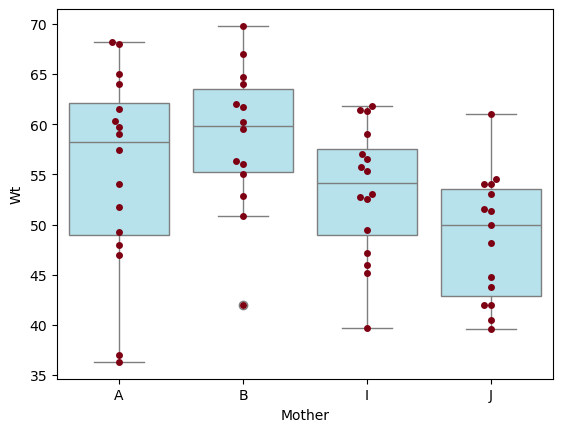

In [4]:
# Example 1: Boxplots 

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data first as boxplots
ax = sns.boxplot(x=genoDF['Mother'], y=genoDF['Wt'], data=genoDF, color='#aee8f5')

# Replot the data as an x-y scatterplot
ax = sns.swarmplot(x=genoDF['Mother'], y=genoDF['Wt'], data=genoDF, color='#7d0013')

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image04.png)

### **Exercise 2: Boxplots**

In the cell below use Python to create boxplots of the data stored in the DataFrame `cushDF`. Since the number of datapoints in this dataset is relatively small, we can also plot each data value in red in an x-y scatterplot.

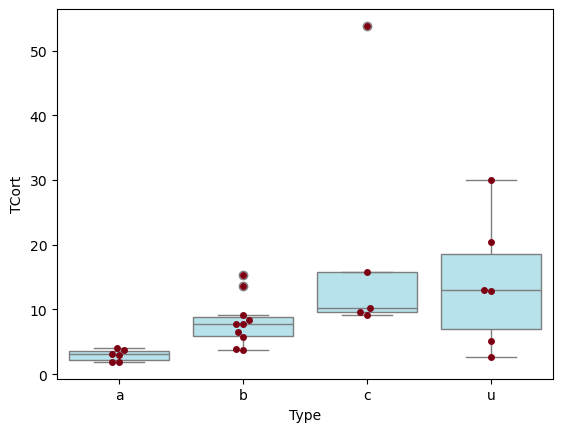

In [5]:
# Insert your code for Exercise 2 here

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data first as boxplots
ax = sns.boxplot(x=cushDF['Type'], y=cushDF['TCort'], data=cushDF, color='#aee8f5')

# Replot the data as an x-y scatterplot
ax = sns.swarmplot(x=cushDF['Type'], y=cushDF["TCort"], data=cushDF, color='#7d0013')

# Show plot
plt.show()

If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image02.png)

### Example 3: Perform ANOVA on Data in a DataFrame

The cell below shows the Python code to perform an ANOVA on the genotype data in the DataFrame genoDF. In this example, we are using the variable `Mother` as the independent variable and weight gain of the litter `Wt` as the dependent variable. The null hypothesis is that the average weight gain of the 4 litters after 28 days did not vary significantly depending upon the Mother.

_Code Description:_

Here is the code chunk that performs the ANOVA:
~~~text
model = ols('Wt ~ Mother', data=genoDF).fit()
~~~~

This line of code performs an Ordinary Least Squares (OLS) regression using the statsmodels library in Python. Here’s a breakdown of what each part does:

`ols('Wt ~ Mother', data=genoDF):`
+ `ols:` This function from statsmodels.formula.api specifies an OLS regression model.
+ `'Wt ~ Mother'`: This is the formula for the regression model. It indicates that Wt (weight) is the dependent variable and Mother is the independent variable. The tilde (~) separates the dependent variable from the independent variable(s). -- data=genoDF: This specifies that the data for the regression model is in the DataFrame genoDF.
+ `.fit()`: This method fits the OLS regression model to the data. It estimates the coefficients of the regression model.

The next line of code:
~~~text
anova_table = sm.stats.anova_lm(model, typ=2)
~~~
performs the actual Analysis of Variance (ANOVA) on the fitted linear model model using the statsmodels library.

Here’s a detailed breakdown:

`sm.stats.anova_lm(model, typ=2)`:
+ `sm.stats.anova_lm`: This function from the statsmodels library generates an ANOVA table for one or more fitted linear models.
+ `model:` This is the fitted linear model object created earlier using the ols function and the .fit() method.
+ `typ=2`: This specifies the type of ANOVA to perform. Type II ANOVA is used when you want to test each main effect after accounting for all other main effects, but without considering interactions12.
+ `anova_table`:
This variable stores the resulting ANOVA table, which includes important statistics such as:
* + **Sum of Squares (sum_sq):** Measures the variability explained by each factor.
* + **Degrees of Freedom (df):** The number of independent values or quantities which can be assigned to a statistical distribution.
* + **F-Statistic (F):** The ratio of the variance explained by the model to the variance within the groups.
* + **P-Value (PR(>F)):** Indicates the probability that the observed data would occur if the null hypothesis were true.

At the bottom of the cell is several lines of code used to create a Python list called grouped_data which is used for **_Bartlett's test_**. Bartlett’s test is a statistical test used to determine whether multiple samples have equal variances. This is important because many statistical tests, like ANOVA (Analysis of Variance), assume that the variances across groups are equal. Bartlett’s test helps verify this assumption.

Here’s a brief overview of how Bartlett’s test works:

1, **Hypotheses:**
+ **Null Hypothesis ($H_0$):** All groups have equal variances.
+ **Alternative Hypothesis ($H_A$)**: At least one group has a different variance.

2. **Test Statistic:**
The test statistic for Bartlett’s test follows a chi-square distribution. It is calculated based on the variances of the groups and the number of observations in each group.

3. **Sensitivity:** Bartlett’s test is sensitive to departures from normality. If the data is not normally distributed, the test may incorrectly indicate unequal variances. In such cases, alternatives like Levene’s test or the Brown-Forsythe test, which are less sensitive to non-normality, might be more appropriate.

In [6]:
# Example 3: Perform ANOVA on DataFrame

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define variables
independent_var = 'Mother'
dependent_var = 'Wt'

# Print header
print(f"----ANOVA Results for {dependent_var} ~ {independent_var}---------")

# Summary statistics
geno_summary = genoDF.groupby(independent_var)[dependent_var].agg(['mean', 'std', 'count'])
print(geno_summary)

# ANOVA
geno_model = ols(f'({dependent_var} ~ {independent_var})', data=genoDF).fit()
geno_aov_table = sm.stats.anova_lm(geno_model, typ=2)
print(geno_aov_table)

# Generate grouped data for Bartlett's test
# Initialize an empty list to store the grouped data
grouped_data = []

# Get the unique groups from the independent variable
unique_groups = genoDF[independent_var].unique()

# Loop through each unique group
for group in unique_groups:
    # Filter the DataFrame for the current group
    group_data = genoDF[dependent_var][genoDF[independent_var] == group]

    # Append the filtered data to the grouped_data list
    grouped_data.append(group_data)

# Check for missing values
if genoDF['Wt'].isnull().any():
    print(f"Warning: Missing values detected in {dependent_var} column. Please handle them before proceeding.")
else:
    # Bartlett's test for equal variances
    bartlett_test = stats.bartlett(*grouped_data)
    print(f"Bartlett's test: chi2 = {bartlett_test.statistic:.4f}, p-value = {bartlett_test.pvalue:.4f}")

----ANOVA Results for Wt ~ Mother---------
           mean       std  count
Mother                          
A       55.4000  9.889186     16
B       58.7000  7.242078     14
I       53.3625  6.452790     16
J       48.6800  6.297301     15
               sum_sq    df         F    PR(>F)
Mother     771.605385   3.0  4.404509  0.007433
Residual  3328.521500  57.0       NaN       NaN
Bartlett's test: chi2 = 4.0342, p-value = 0.2578


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for Wt ~ Mother---------
           mean       std  count
Mother                          
A       55.4000  9.889186     16
B       58.7000  7.242078     14
I       53.3625  6.452790     16
J       48.6800  6.297301     15
               sum_sq    df         F    PR(>F)
Mother     771.605385   3.0  4.404509  0.007433
Residual  3328.521500  57.0       NaN       NaN
Bartlett's test: chi2 = 4.0342, p-value = 0.2578

~~~

## **Interpreting an ANOVA Table**

The output generated by Example 3 and **Exercise 3** contain a lot of information about the results of the ANOVA analysis in the form of an ANOVA table.

An **_ANOVA (Analysis of Variance) table_** is a structured way to present the results of an ANOVA test. It helps in determining whether there are statistically significant differences between the means of three or more groups.

Here are the key components typically included in an ANOVA table:

* **Source of Variation:** This column identifies the different sources of variability in the data, such as between groups and within groups.
* **Sum of Squares (SS):** Measures the total variation within each source.
* **Degrees of Freedom (df):** Represents the number of independent values that can vary for a given statistical calculation.
* **Mean Square (MS):** Calculated by dividing the sum of squares by the degrees of freedom. It’s an estimate of the variance within a particular source.
* **F-Value:** A ratio of the mean square between groups to the mean square within groups, used to determine the significance.
* **P-Value:** Indicates the probability that the observed results occurred by chance. A low p-value (< 0.05) suggests a significant difference between group means.

### **Exercise 3: Peform ANOVA on a DataFrame**

In the cell below, perform an ANOVA on the data in your DataFram `cushDF`. Make your independent variable `Type` and your dependent variable `TCort`. Include in your analysis Barlett's test.

In [7]:
# Insert your code for Exercise 3 here

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define variables
independent_var = 'Type'
dependent_var = 'TCort'

# Print header
print(f"----ANOVA Results for {dependent_var} ~ {independent_var}---------")

# Summary statistics
cush_summary = cushDF.groupby(independent_var)[dependent_var].agg(['mean', 'std', 'count'])
print(cush_summary)

# ANOVA
cush_model = ols(f'({dependent_var} ~ {independent_var})', data=cushDF).fit()
cush_aov_table = sm.stats.anova_lm(cush_model, typ=2)
print(cush_aov_table)

# Generate grouped data for Bartlett's test
# Initialize an empty list to store the grouped data
grouped_data = []

# Get the unique groups from the independent variable
unique_groups = cushDF[independent_var].unique()

# Loop through each unique group
for group in unique_groups:
    # Filter the DataFrame for the current group
    group_data = cushDF[dependent_var][cushDF[independent_var] == group]

    # Append the filtered data to the grouped_data list
    grouped_data.append(group_data)

# Check for missing values
# Bartlett's test for equal variances
bartlett_test = stats.bartlett(*grouped_data)
print(f"Bartlett's test: chi2 = {bartlett_test.statistic:.4f}, p-value = {bartlett_test.pvalue:.4f}")

----ANOVA Results for TCort ~ Type---------
           mean        std  count
Type                             
a      2.966667   0.924482      6
b      8.180000   3.789107     10
c     19.720000  19.238815      5
u     14.016667  10.095824      6
               sum_sq    df         F    PR(>F)
Type       893.521000   3.0  3.225739  0.041218
Residual  2123.645667  23.0       NaN       NaN
Bartlett's test: chi2 = 31.5950, p-value = 0.0000


If the code is correct, you should see the following output:

~~~text
----ANOVA Results for TCort ~ Type---------
           mean        std  count
Type                             
a      2.966667   0.924482      6
b      8.180000   3.789107     10
c     19.720000  19.238815      5
u     14.016667  10.095824      6
               sum_sq    df         F    PR(>F)
Type       893.521000   3.0  3.225739  0.041218
Residual  2123.645667  23.0       NaN       NaN
Bartlett's test: chi2 = 31.5950, p-value = 0.0000

~~~

#### **Interpret this ANOVA table** 

Overall the model is significiant, `F` = `3.225739`, `PR(>F)` = `0.041218`. This tells us that there is a significant difference in the group means. The coefficients (coef in the table), are the difference in mean between the control group and the respective group listed. 

Looking at the p-values now (P>(>F) in the table), we can see the difference between the tumor types (`a`, `b`, `c`, `u`) in their production of `TCort`(trahydrocortisone) is "statistically" significant, p = 0.041218, but just barely. The ANOVA table does **_not_** tell us which group (or groups) are different. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other.

This method provides more information and is overall more useful. Like mentioned earlier, the intercept group is the high dose group since the high dose group’s data was not included in the model’s formula. Their data is still captured because this group has values of 0 in both of the other groups.

Something to note, at the bottom of the table there are a few tests that were conducted to test the models’s assumptions. This will be discussed later and shown how to call these diagnostics without printing out the model in the regression format.

## **Calculating Model Effect Size**

Something that is useful is the effect size. The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta-squared ($\eta^2$), and omega-sqaured ($\omega^2$). $\omega^2$ is considered a better measure of effect size than $\eta^2$ because it is unbiased in it’s calculation.

Something to note, for some reason $R^2$ is called $\eta^2$ within the ANOVA framework. They are the same thing. $R^2$ is a measure of how much variance is explained by the model and is calculated by taking the explained variance (SSM) and dividing it by the total variance (SST; also called total sum of squares). With the total variance (SST) equaling the sum of squares for the model (SSM) plus the sum of square for the residual (SSR). Thus making the equation for $R^2$ and $\eta^2$:

$$ R^2 \text{ and } \eta^2 = SSM/SST $$

Another thing we need to calculate is the mean squares. The mean squares is desired because it eliminates the bias present in the SSM and SSR, and it is also used to calculate the F-statistic and omega squared. SSM and SSR are biased because they are influenced by the number of values summed to calculated them. To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.

$$ MSM= SSM/dfM $$

$$ MSR= SSR/dfR $$

MSM is the average amount of variance explained by the current model, MSR is the average amount of variance unexplained by the current model. The ratio of MSM to MSR is used to calculate the F-statistic. We don’t need to do this since we already have it, but it’s nice to understand where the numbers come from!

### Example 4: Adding $\eta^2$ and $\omega^2$ to the ANOVA table

The code in the cell below, createss a custom function called `anova_table()` that adds the statistic $\eta^2$ to the ANOVA output. What's interesting about the code is the way it demonstrates how to add custom statistics to a "pre-packaged" output. 

In [8]:
# Example 4: Adding eta-squared to the ANOVA table

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'].iloc[-1]))/(sum(aov['sum_sq'])+aov['mean_sq'].iloc[-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']

    aov = aov[cols]
    return aov


anova_table(geno_aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Mother,771.605385,3.0,257.201795,4.404509,0.007433,0.188191,0.143421
Residual,3328.521500,57.0,58.395114,NaN,NaN,NaN,NaN


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image05.png)

### **Exercise 4: Adding $\eta^2$ and $\omega^2$ to the ANOVA table**

In the cell below, write the code to create a custom function called `anova_table()` that adds the statistic $\eta^2$ to the ANOVA output for your ANOVA analysis in **Exercise 3** called `aov_table_cush`. 

In [9]:
# Insert your code for Exercise 4 here

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'].iloc[-1]))/(sum(aov['sum_sq'])+aov['mean_sq'].iloc[-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

# Print table
anova_table(cush_aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Type,893.521000,3.0,297.840333,3.225739,0.041218,0.296146,0.198271
Residual,2123.645667,23.0,92.332420,NaN,NaN,NaN,NaN


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image06.png)

## Assumption Checks/Model Diagnostics
As mentioned earlier, when working with linear regression and ANOVA models, the assumptions pertain to the residuals and not the variables themselves. Using Statsmodels, we can use the diagnostics that is already provided. The default output is not pretty, so often times I like to print the model summary as a regression table and look there than use the following code as it’s more readable in the regression table.

## Other ways to check assumptions
Here are some other ways to test the assumptions of the ANOVA model that can be used when conducting an ANOVA.

### Example 5: Residuals vs Fitted Values

A plot of **_residuals versus fitted values_** in ANOVA is essential for several reasons:

1. **Identifying Patterns:** It helps identify any patterns that might suggest the model's assumptions have been violated. Residuals should ideally be randomly scattered around zero without any discernible pattern.

2. **Checking Homoscedasticity**: Homoscedasticity means the residuals have constant variance. A residual plot can show whether this assumption holds or if there's a “funnel” shape, suggesting variance changes.

3. **Spotting Outliers:** Outliers can significantly impact your analysis. Residual plots can highlight data points that don’t fit the model well.

4. **Ensuring Linearity:** For models assuming linear relationships, residual plots help confirm if this assumption is met. Non-random patterns might indicate non-linearity.

The code in the cell below uses the Python package `matplotlib.pyplot` to generate a scatterplot of residuals versus fitted values for the data in the DataFrame `genoDF`.

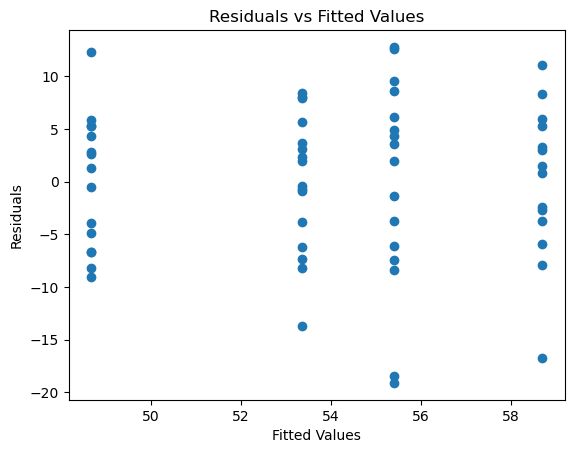

In [10]:
# Example 5: Residuals vs Fitted Values

import matplotlib.pyplot as plt

# Extract residuals from model
geno_residuals = geno_model.resid

# Plot scatterplot
plt.scatter(geno_model.fittedvalues, geno_residuals)

# Add labels
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image07.png)

### **Interpreting a residuals versus fitted values plot**

Interpreting a residuals versus fitted values plot is key to validating your regression model’s assumptions:

1. **Random Scattering:** Ideally, residuals should be randomly dispersed around the horizontal axis (zero line). This indicates that the model’s assumptions are met, including linearity and homoscedasticity.

2. **Patterns:** Presence of patterns (e.g., a curve or systematic structure) suggests the model isn’t capturing all the information from the data. This could mean the need for a different model or transformation of variables.

3. **Homoscedasticity:** Check for constant variance. If the residuals fan out or contract as fitted values increase, this indicates heteroscedasticity, meaning variance isn’t constant.

4. **Outliers:** Look for points that are far from the zero line, as these can indicate outliers or influential points that could disproportionately affect your model.

### **Exercise 5: Residuals vs Fitted Values**

In the cell below use the Python package `matplotlib.pyplot` to generate a scatterplot of residuals versus fitted values for the data in your DataFrame `cushDF`. Make sure to call your residuals `crush_residuals`. 

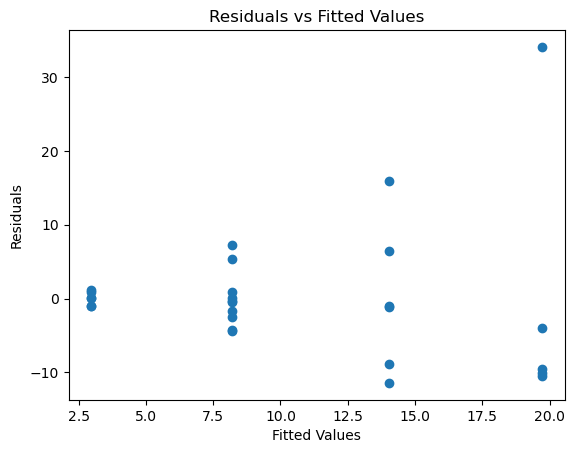

In [11]:
# Insert your code for Exercise 5 here

import matplotlib.pyplot as plt

# Extract residuals from model
cush_residuals = cush_model.resid

# Plot scatterplot
plt.scatter(cush_model.fittedvalues, cush_residuals)

# Add labels
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image08.png)

### Example 6: QQ Plot

A **_QQ Plot_**, or _Quantile-Quantile Plot_, is a graphical tool to assess if a dataset follows a particular distribution, typically the normal distribution. It compares the quantiles of your data against the quantiles of a theoretical distribution.

#### **Interpretation:**

* **Straight Line:** If the data points lie roughly along a 45-degree line, it indicates that the data follows the theoretical distribution.
* **Deviations from Line:** Departures from the line suggest deviations from the specified distribution. For example, if the tails of the QQ plot diverge from the line, it may indicate heavier or lighter tails than the theoretical distribution.
* **S-Shaped Curve:** If the QQ plot curves in an S shape, it may indicate that the data is skewed.

The code in the cell below generates a QQ Plot for the data in the DataFrame `genoDF` using the value `geno_residuals` created in Example 5.


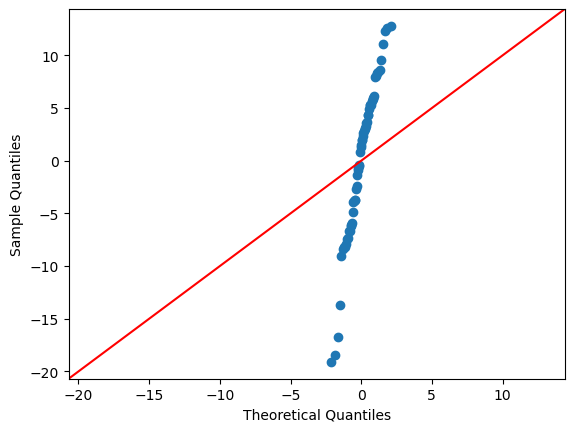

In [12]:
# Example 6: QQ PLot

import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(geno_residuals, line='45')

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image09.png)

### **Exercise 6: QQ Plot**

In the cell below, generate a QQ Plot for the data in the DataFrame `cushDF` using the value `cush_residuals` created in **Exercise 5**.


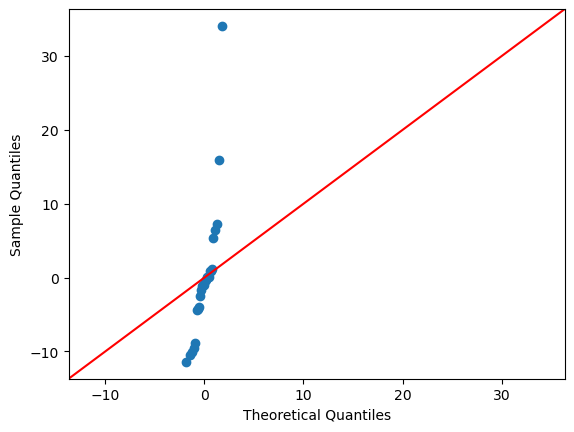

In [13]:
# Insert your code for Exercise 6 here

import statsmodels.api as sm

# Plot QQ plot
sm.qqplot(cush_residuals, line='45')

# Show plot
plt.show()


If the code is correct, you should see the following plot:

![_____](https://biologicslab.co/STA1403/images/assignment_07_image10.png)

### Example 7: Check for Homogenity of Variance

**_Levene’s Test_** checks for homogeneity of variances, which means it tests if different samples have the same variance. It’s a crucial step in ANOVA and other statistical analyses because many parametric tests assume that variances are equal across groups.

#### **Why It’s Important:**

1. **Validates Assumptions:** Ensures that the assumption of equal variances holds, which is vital for the validity of many statistical tests like ANOVA.

2. **Reliability:** Helps in assessing the reliability of the test results. Unequal variances can distort the findings, leading to incorrect conclusions.

3. **Robustness:** Levene's test is robust against departures from normality, making it useful even when the data doesn’t perfectly follow a normal distribution.

The code in the two cells below performs Levene's Test on the data in the DataFrame `genoDF`. In Example 7A, a list of the different groups of `Mother` in `genoDF` is printed out. These values are then used in Example 7B to perform Levene's test.

### Example 7A: Print out value in a DataFrame column

In order to perform Levene's test, we need to know the names of the different categorical values in the column called `Mother`. The code in the cell below shows how to do this.

In [14]:
# Example 7A:Print unique values in the 'Category' column

import pandas

# Create a list of unique values in the column
unique_values = genoDF['Mother'].unique()

# Print out the value
print(unique_values)

['A' 'B' 'I' 'J']


If the code is correct, you should see the following output:

~~~text
['A' 'B' 'I' 'J']
~~~

This is a list of the 4 different groups of mothers (`Mother`) in the DataFrame.

### Example 7B: Perform Levene's Test

Now that we know the labels for the different groups, we can perform Levene's test as shown in the cell below.

In [15]:
# Example 7B: Perform Levene's test

import scipy.stats

# Perform Levene test
geno_homogenity = stats.levene(genoDF['Wt'][genoDF['Mother'] == 'A'],
                               genoDF['Wt'][genoDF['Mother'] == 'B'],
                               genoDF['Wt'][genoDF['Mother'] == 'I'],
                               genoDF['Wt'][genoDF['Mother'] == 'J'])

# Print results
geno_homogenity

LeveneResult(statistic=1.1424144253671096, pvalue=0.3397875733556407)

If the code is correct, you should see the following output:
~~~text
LeveneResult(statistic=1.1424144253671096, pvalue=0.3397875733556407)
~~~
Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variances.

### **Exercise 7A: Print out unique values in a DataFrame column**

In the cell below, print out the different values in the column `Type` in your DataFrame `cushDF`.

In [16]:
# Insert your code for Execise 7A here

import pandas

# Create a list of unique values in the column
unique_values = cushDF['Type'].unique()

# Print out the value
print(unique_values)

['a' 'b' 'c' 'u']


If your code is correct, you should see the following output:

~~~text
['a' 'b' 'c' 'u']
~~~

This is a list of the 4 different turmor types (`Type`) in your DataFrame `cushDF`.

### **Exercise 7B: Perform Levene's Test**

In the cell below, perform Levene's test on your DataFrame `cushDF`.

In [17]:
# Insert your code for Exercise 7B here

cush_homogenity = stats.levene(cushDF['TCort'][cushDF['Type'] == 'a'],
                               cushDF['TCort'][cushDF['Type'] == 'b'],
                               cushDF['TCort'][cushDF['Type'] == 'c'],
                               cushDF['TCort'][cushDF['Type'] == 'u'])

cush_homogenity

LeveneResult(statistic=1.4638116353797523, pvalue=0.25050472991960193)

If your code is correct, you should see the following output:
~~~text
LeveneResult(statistic=1.4638116353797523, pvalue=0.25050472991960193)
~~~

Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variance.

## Assumption: Normality

The assumption of normality is tested on the residuals as a whole which is how the diagnostic information provided by statsmodels tests the residuals. One could use the Jarque-Bera test provided, or one could use Shapiro or others. I will demonstrate how to test for normality using the Shapiro method. The output is not labelled, but the numbers are the test statistic value followed by the p-value. The official documentation can be found here.

### Example 8: Check Normality

The **_Shapiro-Wilk_** test is a statistical test that checks if a data sample comes from a normally distributed population. 

Here’s a summary:

* **Purpose:** It evaluates the null hypothesis that the data is drawn from a normal distribution.

* **Output:** It provides a test statistic and a p-value. A small p-value (typically < 0.05) indicates that the data deviates significantly from normality.

* **Usage:** It's particularly useful for small to medium-sized datasets.

The code in the cell below performs the Shapiro-Wilk test on the `genoDF` DataFrame.

In [18]:
# Example 7: Check Normality

# Peform test
geno_normality =stats.shapiro(geno_model.resid)

# Print results
geno_normality

ShapiroResult(statistic=0.9655370712280273, pvalue=0.0833505243062973)

If the code is correct, you should see the following output:
~~~text
ShapiroResult(statistic=0.9655370712280273, pvalue=0.0833505243062973)
~~~

The results from the Shapiro-Wilk test are not significant (pvalue=0.0833505) which indicates that the residuals are normally distributed.

### **Exercise 8: Check Normality**

In the cell below, perform the Shapiro-Wilk test on your `cushDF` DataFrame.

In [19]:
# Insert your code for Exercise 8 here

# Peform test
cush_normality =stats.shapiro(cush_model.resid)

# Print results
cush_normality

ShapiroResult(statistic=0.785287082195282, pvalue=7.692295912420377e-05)

If your code is correct, you should see the following output:
~~~text
ShapiroResult(statistic=0.785287082195282, pvalue=7.692295912420377e-05)
~~~

The results from the Shapiro-Wilk test are _highly_ significant (pvalue=7.692295912420377e-05) which indicates that the residuals are **_not_** normally distributed.

-------------------

## Violation of the Normality Assumption 

When the samples in an ANOVA are not normally distributed, several issues can arise:

* **Increased Type I Error Rate:** The likelihood of falsely rejecting the null hypothesis (i.e., finding a significant effect when there isn’t one) can increase.
* **Reduced Power:** The ability to detect a true effect may be diminished, leading to a higher chance of Type II errors (i.e., failing to detect a significant effect when there is one).
* **Misleading Results:** The F-statistic used in ANOVA relies on the assumption of normality. When this assumption is violated, the results can be misleading.
* **Robustness:** While ANOVA is somewhat robust to violations of normality, especially with large sample sizes, severe deviations can still impact the validity of the results3.

To address non-normality, you can consider:

* **Data Transformation:** Applying transformations (e.g., log, square root) to make the data more normally distributed.
* **Non-parametric Alternatives:** Using tests like the Kruskal-Wallis test, which do not assume normality.

-------------------

## **Post-hoc Testing**

When an ANOVA model is statistically significant, **_post hoc_** testing can be used to determine how the groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 

_Three common methods are:_

* **Fisher’s Least Significant Difference (LSD):** Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.

* **Bonferroni correction:** Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.

* **Tukey’s HSD:** Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.
There are many other techniques out there that can be used for post-hoc testing each with different guidelines for when they should be used.

## Tukey's HSD Post-Hoc Comparison

Tukey’s Honestly Significant Difference (HSD) test is a post-hoc analysis used after an ANOVA to determine which specific group means are significantly different from each other. Here’s a breakdown of how it works:

**Purpose**
After an ANOVA indicates that there are significant differences among group means, Tukey’s HSD test helps identify exactly which pairs of group means are different.

**Method**

* **Pairwise Comparisons:** The test compares all possible pairs of means.
* **Studentized Range Distribution:** It uses the studentized range distribution to determine the critical value for the comparisons.
* **Calculation:** The HSD statistic is calculated for each pair of means. If the difference between the means is greater than the HSD value, the difference is considered significant.

**Steps**
* **Perform ANOVA:** Ensure the ANOVA test shows significant results.
* **Calculate HSD:** Use the formula involving the mean square error (MSE) from the ANOVA, the number of observations, and the critical value from the studentized range distribution.
* **Compare Means:** Check if the calculated differences between means exceed the HSD value.

**Assumptions**
* **Normality:** The data should be normally distributed.
* **Independence:** Observations should be independent.
* **Homogeneity of Variances:** Variances within groups should be equal.

### Example 9: Tukey's HSD Post-Hoc Comparison

The code in the cell below performs Tukey's HSD Post-Hoc Comparison on the data in `genoDF`.

In [20]:
# Example 9: Tukey's HSD Post-Hoc Comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Create variable
geno_multi = MultiComparison(genoDF['Wt'], genoDF['Mother'])

# Perform test
geno_Tukey_results = geno_multi.tukeyhsd()

# Print results
print(geno_Tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      3.3 0.6418   -4.101  10.701  False
     A      I  -2.0375 0.8745  -9.1876  5.1126  False
     A      J    -6.72 0.0797 -13.9883  0.5483  False
     B      I  -5.3375  0.236 -12.7385  2.0635  False
     B      J   -10.02 0.0045 -17.5353 -2.5047   True
     I      J  -4.6825 0.3306 -11.9508  2.5858  False
-----------------------------------------------------


If the code is correct, you should see the following output:

~~~text
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
=====================================================
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      3.3 0.6418   -4.101  10.701  False
     A      I  -2.0375 0.8745  -9.1876  5.1126  False
     A      J    -6.72 0.0797 -13.9883  0.5483  False
     B      I  -5.3375  0.236 -12.7385  2.0635  False
     B      J   -10.02 0.0045 -17.5353 -2.5047   True
     I      J  -4.6825 0.3306 -11.9508  2.5858  False
-----------------------------------------------------

~~~

The `Tukey HSD post-hoc comparison test` controls for `type I error` and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the `meandiff` column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

As you can see, only one group1-group2 comparision should be rejected: group `B` vs group `J`.

### **Exercise 9: Tukey's HSD Post-Hoc Comparison**

In the cell below, perform Tukey's HSD Post-Hoc Comparison on your data in the DataFrame `cushDF`.

In [21]:
# Insert your code for Exercise 9 here

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

# Create variable
cush_multi = MultiComparison(cushDF['TCort'], cushDF['Type'])

# Perform test
cush_Tukey_results = cush_multi.tukeyhsd()

# Print resutls
print(cush_Tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   5.2133  0.722 -8.5182 18.9448  False
     a      c  16.7533 0.0394  0.6517  32.855   True
     a      u    11.05 0.2201 -4.3023 26.4023  False
     b      c    11.54 0.1552 -3.0245 26.1045  False
     b      u   5.8367 0.6474 -7.8948 19.5682  False
     c      u  -5.7033 0.7619 -21.805 10.3983  False
----------------------------------------------------


If your code is correct, you should see the following output:

~~~text
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
====================================================
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   5.2133  0.722 -8.5182 18.9448  False
     a      c  16.7533 0.0394  0.6517  32.855   True
     a      u    11.05 0.2201 -4.3023 26.4023  False
     b      c    11.54 0.1552 -3.0245 26.1045  False
     b      u   5.8367 0.6474 -7.8948 19.5682  False
     c      u  -5.7033 0.7619 -21.805 10.3983  False
----------------------------------------------------
~~~

As you can see, only one group1-group2 comparision should be rejected: group `a` vs group `c`.

### **Bonferroni Correct Post-Hoc Comparison**

The **Bonferroni Correction** is widely used in various fields such as medical research, psychology, and social sciences to ensure that the findings are reliable and not due to random chance. The Bonferroni Correction is a post-hoc test used to address the problem of multiple comparisons, which can increase the risk of Type I errors (false positives). Here’s a detailed explanation:

**Purpose**
When conducting multiple statistical tests, the chance of finding at least one significant result due to random chance increases. The Bonferroni Correction adjusts the significance level to control the overall probability of making a Type I error.

**Method**
* **Adjust Significance Level:** The correction involves dividing the original significance level (α) by the number of comparisons (n). This gives a new, more stringent significance level for each individual test.

>  $  \alpha_{\text{adjusted}} = \frac{\alpha}{n}  $

For example, if you have an original α of 0.05 and are making 5 comparisons, the adjusted α would be 

> $  \frac{0.05}{5} = 0.01 $

* **Apply to Tests:** Each individual test is then evaluated against this adjusted significance level. If the p-value of a test is less than or equal to the adjusted α, the result is considered statistically significant.
  
**Steps**
* **Perform ANOVA:** Ensure the ANOVA test shows significant results.
* **Calculate Adjusted α:** Divide the original α by the number of comparisons.
* **Compare p-values:** Check if the p-values of the individual tests are less than the adjusted α.

First the corrected p-value needs to be calculated. This can be done using the formula:

p-value/# of comparisons = 0.05/3 = 0.01667

Now the t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

### Example 10: Bonferroni Correct Post-Hoc Comparison

The code in the cell below performs the Bonferroni Correct Post-Hoc Comparison on the data in `genoDF`. As you can see, you have to manually enter all of the different combinations for comparison.

In [22]:
# Example 10: Bonferroni Correct Post-Hoc Comparison

import scipy.stats as stats

# The groups from Example 7A
#['A' 'B' 'I' 'J']

# Define the combinations for comparison
comparisons = [('A', 'B'), ('B', 'I'), ('I', 'J'), ('A', 'I'), ('A', 'J'), ('B', 'J')]

# Perform t-tests and store results
results = {}
for (type1, type2) in comparisons:
    test_result = stats.ttest_ind(genoDF['Wt'][genoDF['Mother'] == type1], genoDF['Wt'][genoDF['Mother'] == type2])
    results[f'Mother {type1} vs {type2}'] = test_result

# Print results
for comparison, result in results.items():
    print(f"genoDF: {comparison}:", result)


genoDF: Mother A vs B: TtestResult(statistic=-1.0293483718844825, pvalue=0.312126283575645, df=28.0)
genoDF: Mother B vs I: TtestResult(statistic=2.135219933533041, pvalue=0.041631394549673705, df=28.0)
genoDF: Mother I vs J: TtestResult(statistic=2.042699343046161, pvalue=0.05026584411675585, df=29.0)
genoDF: Mother A vs I: TtestResult(statistic=0.6901960776723227, pvalue=0.49537622247776913, df=30.0)
genoDF: Mother A vs J: TtestResult(statistic=2.239180761273432, pvalue=0.032980792826787036, df=29.0)
genoDF: Mother B vs J: TtestResult(statistic=3.9835906104289514, pvalue=0.00046219629285074393, df=27.0)


If the code is correct, you should see the following output:

~~~text
genoDF: Mother A vs B: TtestResult(statistic=-1.0293483718844825, pvalue=0.312126283575645, df=28.0)
genoDF: Mother B vs I: TtestResult(statistic=2.135219933533041, pvalue=0.041631394549673705, df=28.0)
genoDF: Mother I vs J: TtestResult(statistic=2.042699343046161, pvalue=0.05026584411675585, df=29.0)
genoDF: Mother A vs I: TtestResult(statistic=0.6901960776723227, pvalue=0.49537622247776913, df=30.0)
genoDF: Mother A vs J: TtestResult(statistic=2.239180761273432, pvalue=0.032980792826787036, df=29.0)
genoDF: Mother B vs J: TtestResult(statistic=3.9835906104289514, pvalue=0.00046219629285074393, df=27.0)
~~~

As was seen in Tukey's HSD Post-Hoc Comparison (Example 9), the only significant difference is between Mother B and Mother J.

### **Exercise 10: Bonferroni Correct Post-Hoc Comparison**

In the cell below, perform the Bonferroni Correct Post-Hoc Comparison on the data in `cushDF`. As you can see, you have to manually enter all of the different combinations for comparison. Remember, that you previously printed out all of the different groups in **Exercise 7A**.

_Code Hints:_

Use the following line of code when printing out your results:

~~~text
results[f'Tumor {type1} vs {type2}'] = test_result
~~~

In [23]:
# Insert your code for Exercise 10 here

import scipy.stats as stats

# Define the combinations for comparison
comparisons = [('a', 'b'), ('b', 'c'), ('c', 'u'), ('a', 'c'), ('a', 'u'), ('b', 'u')]

# Perform t-tests and store results
results = {}
for (type1, type2) in comparisons:
    test_result = stats.ttest_ind(cushDF['TCort'][cushDF['Type'] == type1], cushDF['TCort'][cushDF['Type'] == type2])
    results[f'Tumor {type1} vs {type2}'] = test_result

# Print results
for comparison, result in results.items():
    print(f"cushDF: {comparison}:", result)


cushDF: Tumor a vs b: TtestResult(statistic=-3.2694286471027563, pvalue=0.005592307958337572, df=14.0)
cushDF: Tumor b vs c: TtestResult(statistic=-1.8933828983181145, pvalue=0.08077803935874399, df=13.0)
cushDF: Tumor c vs u: TtestResult(statistic=0.6333892640655902, pvalue=0.5422381032600005, df=9.0)
cushDF: Tumor a vs c: TtestResult(statistic=-2.1540342010594435, pvalue=0.05964381830107664, df=9.0)
cushDF: Tumor a vs u: TtestResult(statistic=-2.669825595421396, pvalue=0.023499581464362176, df=10.0)
cushDF: Tumor b vs u: TtestResult(statistic=-1.673196778082666, pvalue=0.11647645903534692, df=14.0)


If your code is correct, you should see the following output:

~~~text
cushDF: Tumor a vs b: TtestResult(statistic=-3.2694286471027563, pvalue=0.005592307958337572, df=14.0)
cushDF: Tumor b vs c: TtestResult(statistic=-1.8933828983181145, pvalue=0.08077803935874399, df=13.0)
cushDF: Tumor c vs u: TtestResult(statistic=0.6333892640655902, pvalue=0.5422381032600005, df=9.0)
cushDF: Tumor a vs c: TtestResult(statistic=-2.1540342010594435, pvalue=0.05964381830107664, df=9.0)
cushDF: Tumor a vs u: TtestResult(statistic=-2.669825595421396, pvalue=0.023499581464362176, df=10.0)
cushDF: Tumor b vs u: TtestResult(statistic=-1.673196778082666, pvalue=0.11647645903534692, df=14.0)
~~~


Using the Bonferroni correction, only signficant difference in TCort production is observed between Tumor types "a" and "b" (p-value=0.006). 

## **Lesson Turn-in**

When you have completed and run all of the code cells, create a PDF of your Colab notebook and upload the **_PDF_** to Assignment_07 in Canvas for grading.
